# Online Stochastic Gradient Descent Method

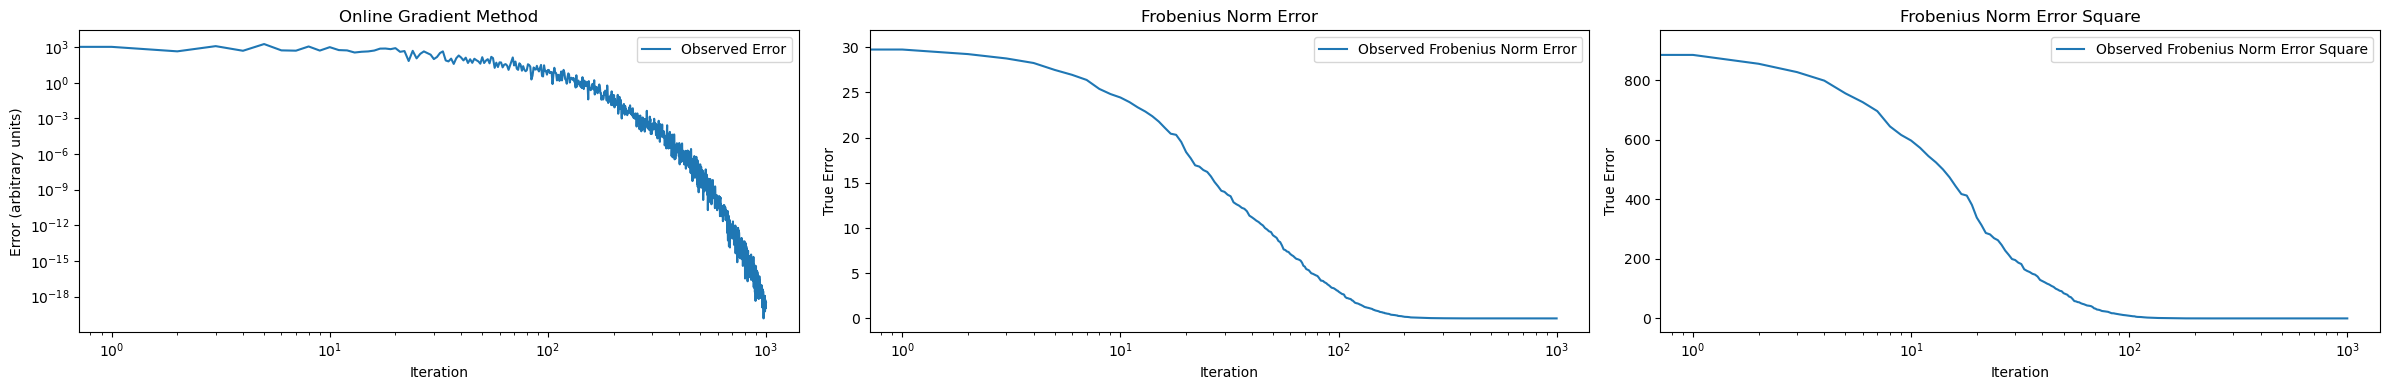

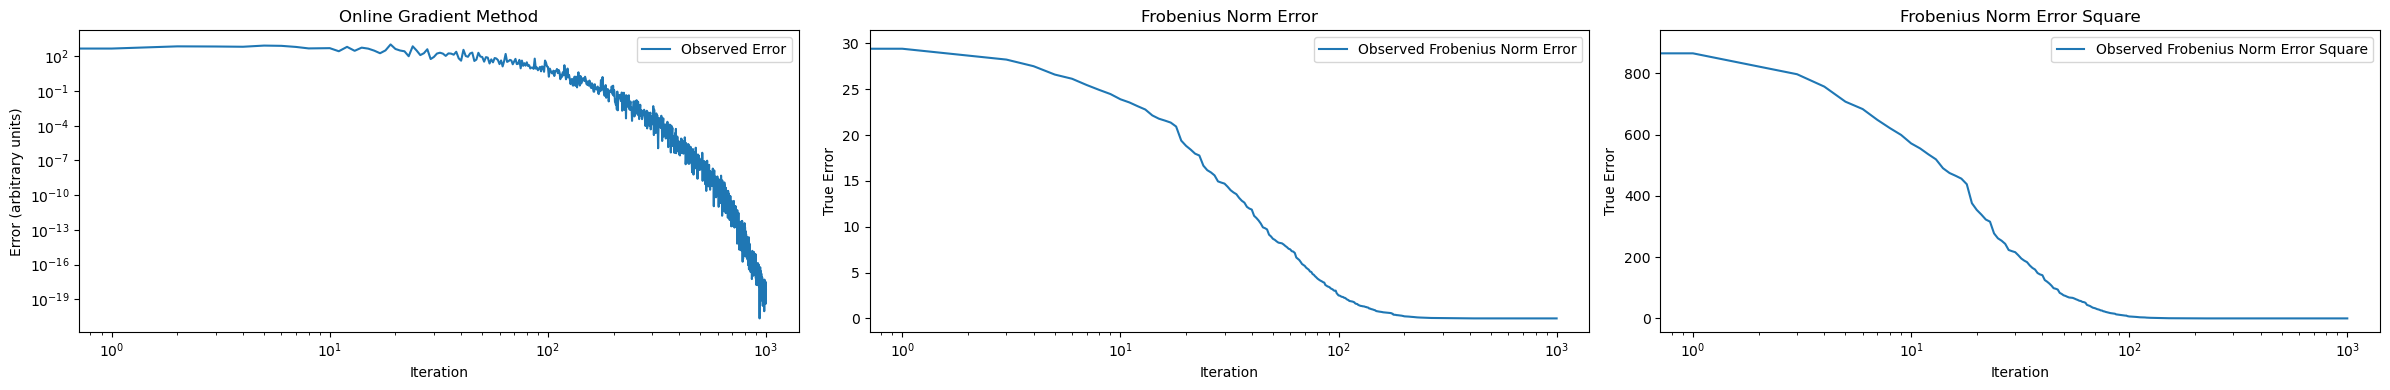

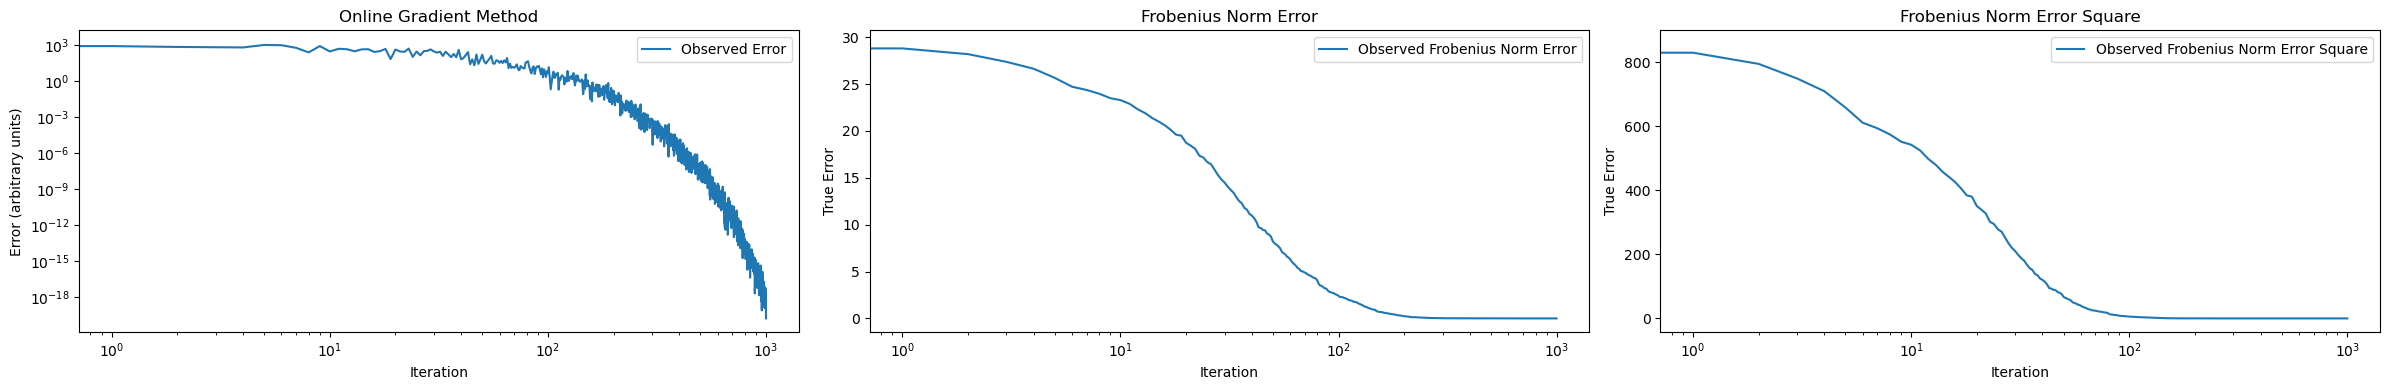

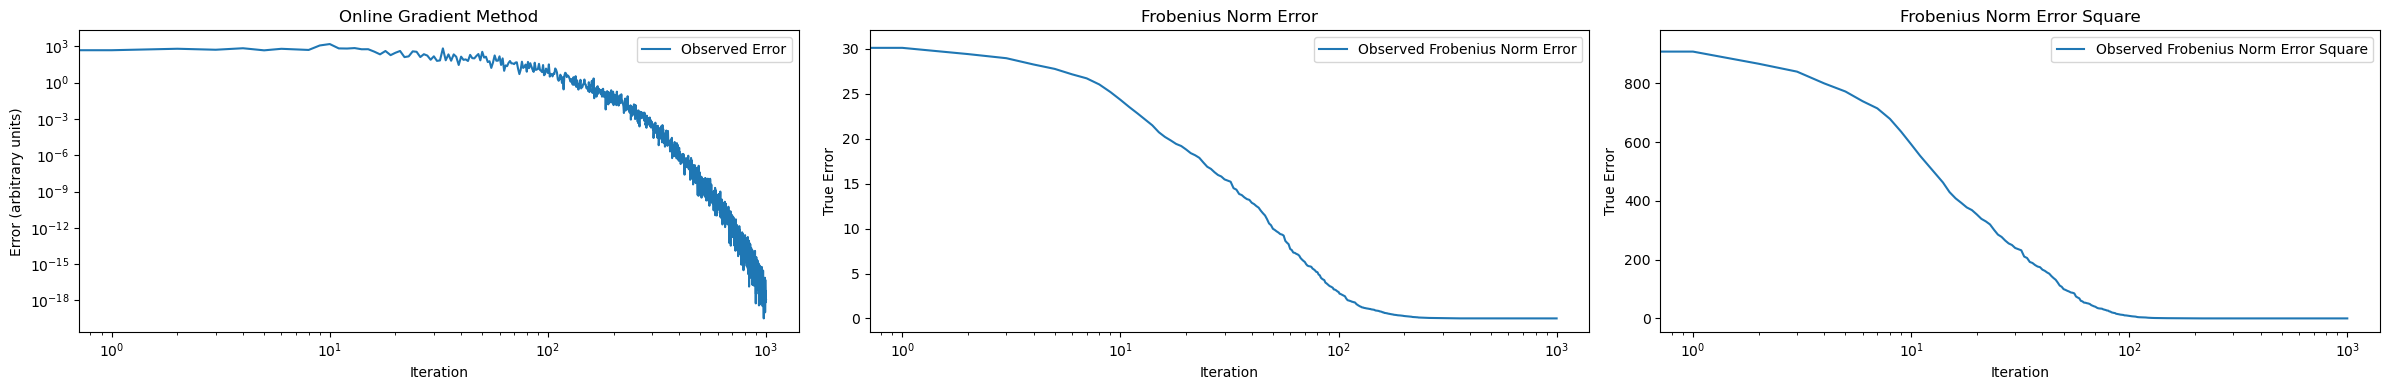

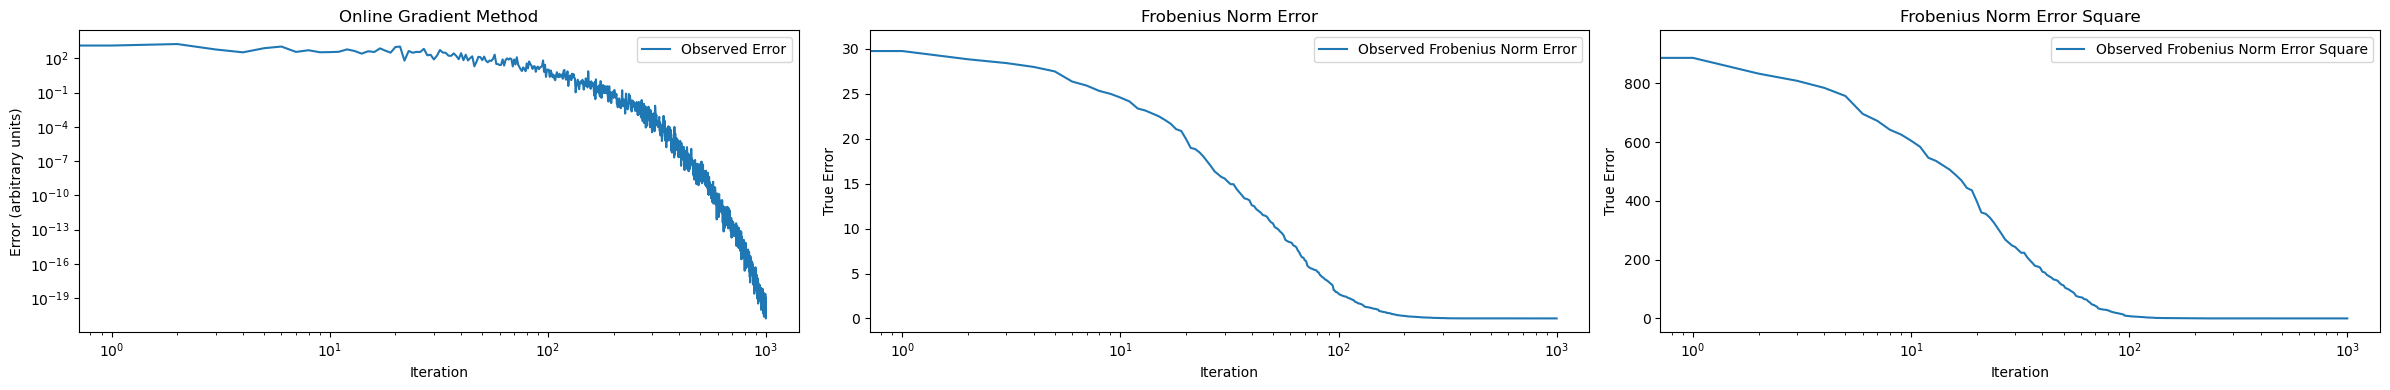

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def online_gradient_descent(W, x, d, alpha):
    y = np.dot(W, x)
    error = y - d
    gradient = np.outer(error, x)
    W -= alpha * gradient
    sqe = np.sum(error**2)
    return W, sqe

def frobenius_norm(m1, m2):
    difference_matrix = m1 - m2
    frobenius_norm = np.linalg.norm(difference_matrix, 'fro')
    return frobenius_norm

N = 20  # input units
M = 25  # output units
iterations = 1000
alpha = 1/(N+2)

for _ in range(5):
    W = np.random.randn(M, N)
    W_true = np.random.randn(M, N)
    errors = []
    true_errors = []
    true_errors_2 = []
    for _ in range(iterations):
        x = np.random.randn(N)
        d = np.dot(W_true, x)
        W, error = online_gradient_descent(W, x, d, alpha)
        errors.append(error)
        true_errors.append(frobenius_norm(W_true, W))
        true_errors_2.append(frobenius_norm(W_true, W)**2)

    fig, axes = plt.subplots(1, 3, figsize=(24, 4))

    axes[0].plot(errors, label='Observed Error')
    axes[0].set_xlabel('Iteration')
    axes[0].set_ylabel('Error (arbitrary units)')
    axes[0].set_xscale('log')
    axes[0].set_yscale('log')
    axes[0].set_title('Online Gradient Method')
    axes[0].legend()

    axes[1].plot(true_errors, label='Observed Frobenius Norm Error')
    axes[1].set_xlabel('Iteration')
    axes[1].set_ylabel('True Error')
    axes[1].set_xscale('log')
    axes[1].set_title('Frobenius Norm Error')
    axes[1].legend()

    axes[2].plot(true_errors_2, label='Observed Frobenius Norm Error Square')
    axes[2].set_xlabel('Iteration')
    axes[2].set_ylabel('True Error')
    axes[2].set_xscale('log')
    axes[2].set_title('Frobenius Norm Error Square')
    axes[2].legend()

    plt.tight_layout()
    plt.show()

In [6]:
np.isclose(W, W_true)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ T

# Online Node Perturbation Method

In [17]:
def node_perturbation(W, x, d, alpha, noise_std):
    xi = np.random.randn(*x.shape) * noise_std
    y = np.dot(W, x)
    error = y - d

    xi_T = xi.reshape(-1, 1)
    perturbation_term = np.dot(xi_T.T, np.dot(W, x)) + 0.5 * np.dot(xi_T.T, xi_T)
    
    W -= (alpha / noise_std**2) * perturbation_term * np.outer(xi, x)
    
    sqe = np.sum(error**2)
    
    return W, sqe
N = 20
M = 25
iterations = 1000
alpha = 1/(M+2)*(N+2)
noise_std = 1e-3

for _ in range(5):
    W = np.random.randn(M, N)
    W_true = np.random.randn(M, N)
    errors = []
    true_errors = []
    true_errors_2 = []
    for _ in range(iterations):
        x = np.random.randn(N)
        d = np.dot(W_true, x)
        W, error = node_perturbation(W, x, d, alpha, noise_std)
        errors.append(error)
        true_errors.append(frobenius_norm(W_true, W))
        true_errors_2.append(frobenius_norm(W_true, W)**2)

    fig, axes = plt.subplots(1, 3, figsize=(24, 4))

    axes[0].plot(errors, label='Observed Error')
    axes[0].set_xlabel('Iteration')
    axes[0].set_ylabel('Error (arbitrary units)')
    axes[0].set_xscale('log')
    # axes[0].set_yscale('log')
    axes[0].set_title('Node Perturbation')
    axes[0].legend()

    axes[1].plot(true_errors, label='Observed Frobenius Norm Error')
    axes[1].set_xlabel('Iteration')
    axes[1].set_ylabel('True Error')
    axes[1].set_xscale('log')
    axes[1].set_title('Frobenius Norm Error')
    axes[1].legend()

    axes[2].plot(true_errors_2, label='Observed Frobenius Norm Error Square')
    axes[2].set_xlabel('Iteration')
    axes[2].set_ylabel('True Error')
    axes[2].set_xscale('log')
    axes[2].set_title('Frobenius Norm Error Square')
    axes[2].legend()

    plt.tight_layout()
    plt.show()

ValueError: shapes (1,20) and (25,) not aligned: 20 (dim 1) != 25 (dim 0)